# STAT 201 Proposal

## Group 11

# Compare the delay rate of two populer airlines in the United States

## Introduction

As the demand of fast speed travel, taking plane becomes one of the most popular choice during the past several decades. At the same time, flight delay is most depressing but also sometimes not avoidable (Carvalho et al., 2020). For instance, among different airlines about 0% to 34% was delayed today (FlightAware, 2023). Therefore, the average delay rate of an airline has become a essential standard for customers to evaluate and choose a company. 

In this project, we will use the dataset that created by Ulrik Thyge Pedersen (2023) to find **if there's a significant difference of the delay rate between Delta Airlines and Amenrican Airline**. This data set includes 18 different airlines and over 500,000 flights. It also includes the departure time, flight length, origin, destination, day of the week and wheather the flight was delayed or not.

# Preliminary Result

In [1]:
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Load Data

In [6]:
airlines_delay <- read.csv("https://raw.githubusercontent.com/rayyyy122/STAT-201-Project/main/airlines_delay.csv", header = TRUE)

#### Raw Dataset

In [7]:
head(airlines_delay)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>
1,2313,1296,141,DL,ATL,HOU,1,0
2,6948,360,146,OO,COS,ORD,4,0
3,1247,1170,143,B6,BOS,CLT,3,0
4,31,1410,344,US,OGG,PHX,6,0
5,563,692,98,FL,BMI,ATL,4,0
6,3692,580,60,WN,MSY,BHM,4,0


<left><em>Table 1: Raw Airlines Delay Dataset</em></left>

## Clean and Wrangle Data

To clean and wrangle our data, we are going to:

1. Select the relevant columns for our question

2. Filter out rows containing `NA`
    

In [10]:
delay_data <- airlines_delay |> 
    filter(Airline %in% c("DL", "AA")) |> 
    rename(Delay = Class) |>
    filter(!is.na(Airline)) |> 
    filter(!is.na(Delay)) |>
    mutate(Delay = as.factor(Delay)) |>
    select(c(Airline, Delay))

head(delay_data)

,Airline,Delay
,<chr>,<fct>
1,DL,0
2,AA,0
3,DL,0
4,DL,0
5,DL,0
6,DL,0


<left><em>Table 2: DL Airline and AA Airline Delay or Not </em></left>

## Broad Overview of Data

We visualized the propotion of airlines delay of these two different airlines to more clearly obvious the difference.

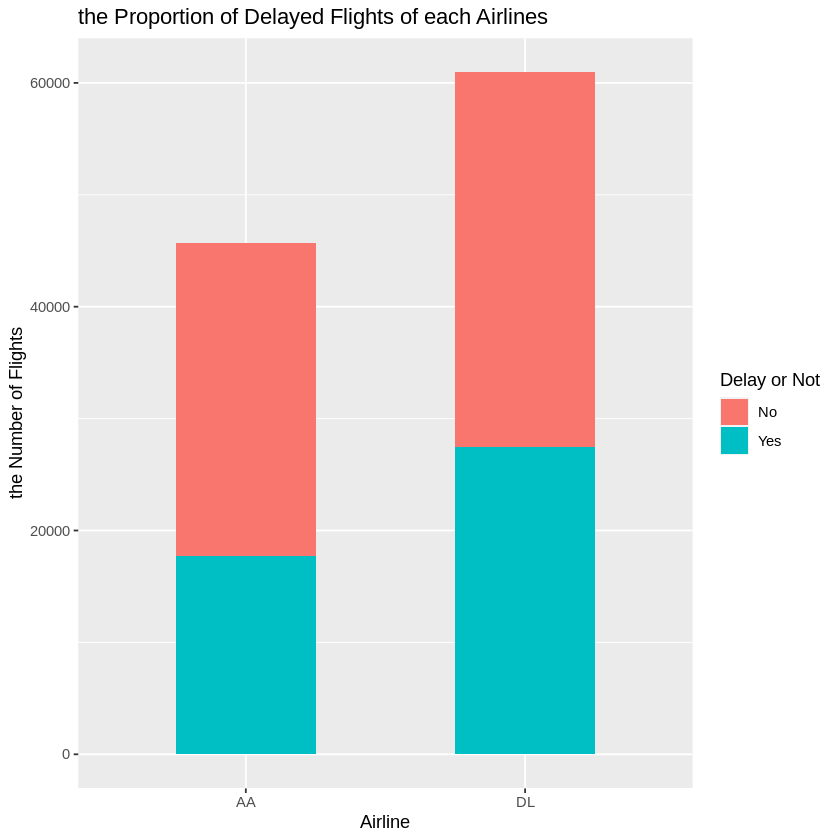

In [13]:
plot <- delay_data |> 
    ggplot(aes(x = Airline, fill = Delay)) +
    geom_bar(width = 0.5) + 
    ylab("the Number of Flights") +
    ggtitle("the Proportion of Delayed Flights of each Airlines") +
    scale_fill_discrete(name = "Delay or Not",
                          breaks = c("0", "1"),
                          labels = c("No", "Yes"))

plot

## Methods 

In this project, we plan to use two different methods to conduct a hypothesis test about Discrepancy between the proportion of delayed flights operated by Delta Airlines and Amenrican Airline. First we will use bootstarpping method in the `infer package` and then we plan to use theory based approach to perform a hypothesis test.

Our null and alternative hypothesis is:

• $H_0 : p_1 = p_2$

• $H_a : p_1 ≠ p_2$

where:

$p_1$ is the proportion of delayed flights in all flights operated by Delta Airlines

$p_2$ is the proportion of delayed flights in all flights operated by American Airlines


### Bootstraping Method

We will be using bootstrapping to compute a 90% confidence interval in first.

## Reference

1. Carvalho, L., Sternberg, A., Maia Gonçalves, L., Beatriz Cruz, A., Soares, J. A., Brandão, D., Carvalho, D., &amp; Ogasawara, E. (2020). On the relevance of data science for Flight Delay Research: A systematic review. Transport Reviews, 41(4), 499–528. https://doi.org/10.1080/01441647.2020.1861123 

2. FlightAware (2023). https://flightaware.com/live/cancelled/

3. Pedersen, U. T. (2023).Airlines Delay. https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay